In [182]:
#We import the necessary libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, validation_curve, learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import umap.umap_ as umap


In [183]:
#df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_pathHFiltNorm = 'HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')


In [184]:
df_seq_HFiltNorm.head()
df_seq_HFiltNorm.shape

(3000, 182)

In [185]:
df_seq_HfiltNormT = df_seq_HFiltNorm.T
df_seq_HfiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [186]:
#we now add the target variable
#df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH_path = 'HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
df_metaH.set_index('Filename', inplace=True)

def add_target_column(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    print
    return merged_data

In [187]:
merged = add_target_column(df_seq_HfiltNormT, df_metaH_path, 'Condition', 'category_Normo')

In [188]:
merged.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,0


# DIMENSIONALITY REDUCTION

In [189]:
# we rescale the data for the dimensionality reduction
df_dim_red = pd.DataFrame(StandardScaler().fit_transform(df_seq_HfiltNormT), columns=df_seq_HfiltNormT.columns, index=df_seq_HfiltNormT.index)

The number of dimensions needed to explain 95% of the variance is 156


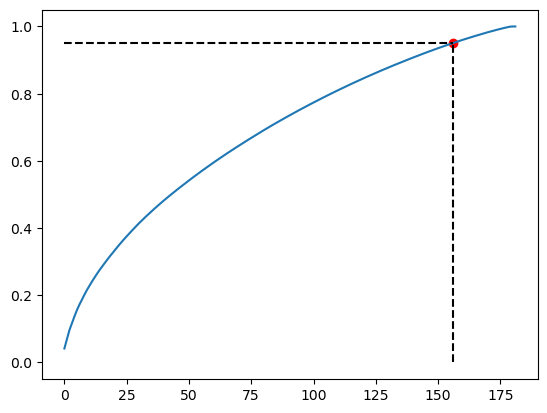

In [190]:
# first, we perform a PCA, with the number of dimensions chosen to explain at least 95% of the variance
pca = PCA()
pca_array = pca.fit_transform(df_dim_red)
pca_array_df = pd.DataFrame(pca_array, columns=[f'PC{i+1}' for i in range(pca_array.shape[1])], index=df_dim_red.index)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
nec_dimensions = np.argmax(cumsum >= 0.95)
plt.scatter(nec_dimensions, 0.95, color='red')
plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')
print(f"The number of dimensions needed to explain 95% of the variance is {nec_dimensions}")

In [191]:
columns = [f'PC{i+1}' for i in range(nec_dimensions)] + ['Condition']
lower_dimensional_df_pca = add_target_column(pca_array_df, df_metaH_path, 'Condition', 'category_Normo')
lower_dimensional_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,-2.849172,-5.641256,3.283657,-1.667505,1.135635,-7.009527,4.770527,3.533012,-1.392528,6.015874,...,1.436432,0.582227,-0.365204,1.104006,-0.914003,-0.594664,-0.569110,0.048935,7.273971e-15,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,7.899027,10.434396,-8.601802,-1.923534,-6.832911,5.648019,-2.703662,0.878815,10.435058,3.384237,...,0.276856,1.034472,0.660339,0.020258,-0.538893,0.231273,-0.008734,-0.086203,7.273971e-15,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,-0.497909,12.686548,-9.234080,3.214453,-2.982438,3.115615,-6.355998,-0.371350,1.712405,3.502314,...,0.815947,0.561735,-0.158756,-0.082145,-0.001870,0.665049,-0.069882,0.001407,7.273971e-15,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,4.081950,8.070230,-4.739527,-7.265787,-10.429683,-12.406240,7.304108,-4.828556,4.779845,7.469944,...,0.034216,-0.631742,0.299086,0.758739,0.286494,0.005387,-0.274822,-0.013367,7.273971e-15,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,2.255481,2.840024,-4.790213,-1.587465,13.384585,8.915837,-7.123104,-5.381233,2.694777,-0.280285,...,-0.167988,-1.450697,-0.446048,1.015894,-0.957183,0.949954,-0.863188,-0.118320,7.273971e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,-5.029623,-0.692542,0.471921,0.697539,-4.912730,-5.934012,2.298884,1.506377,-2.694541,1.711191,...,0.006673,1.125541,1.848602,-0.386280,0.365990,1.526764,0.003624,-0.048710,7.273971e-15,1
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,-10.483137,9.072835,-0.526084,11.323510,-11.529163,-5.013493,-3.475613,6.787753,-8.524545,2.379595,...,0.442726,-0.924479,-0.165619,-0.168816,-0.818704,0.660295,0.626414,0.053303,7.273971e-15,1
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,-3.681015,10.807696,-4.232734,5.482448,3.476512,-2.294010,-3.331740,1.998145,-6.198678,1.467658,...,-0.219549,-0.043041,0.422946,1.048135,-0.346230,0.364162,-0.434468,-0.010178,7.273971e-15,0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,-5.148520,-2.659664,0.176754,1.404909,-1.671454,-4.645645,0.249085,1.700167,-0.822144,0.593615,...,5.684210,1.257320,-1.070468,7.220301,23.627545,-6.052572,5.841612,0.172670,7.273971e-15,1


In [192]:
# now, we use umap. since it's harder to estimate the explained variance, we use a heuristic: the number of components will be the same as in PCA
reducer = umap.UMAP(n_components=nec_dimensions, n_neighbors=50) #qualitatively, 50 neighbors seemed to work well for out scope
embedding = reducer.fit_transform(df_dim_red)
columns = [f'UMAP{i+1}' for i in range(embedding.shape[1])]
umap_embedding_df = pd.DataFrame(embedding, columns=columns, index=df_dim_red.index)
lower_dimensional_df_umap = add_target_column(umap_embedding_df, df_metaH_path, 'Condition', 'category_Normo')

lower_dimensional_df_umap

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP148,UMAP149,UMAP150,UMAP151,UMAP152,UMAP153,UMAP154,UMAP155,UMAP156,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,2.430844,2.096373,4.620358,4.540095,5.504283,5.427182,7.503415,5.870141,5.311581,5.477170,...,6.117482,5.699765,3.262760,4.257579,5.134270,4.925242,3.036838,3.141599,6.732772,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,2.608182,2.211691,4.444628,4.478703,5.373221,5.434824,7.458936,5.958225,5.141964,5.674380,...,6.001622,5.782501,3.487544,4.181736,5.210449,4.813437,2.742647,3.389911,6.571314,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,2.623922,2.151371,4.569957,4.371127,5.255522,5.361036,7.405098,5.883994,5.245094,5.611963,...,5.932151,5.819528,3.479105,4.196747,5.084920,4.821316,2.831231,3.498533,6.648799,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2.525188,2.202502,4.363709,4.497760,5.289162,5.458400,7.315910,5.927915,5.313221,5.634093,...,5.915042,5.708439,3.614896,4.345879,5.124655,4.867333,2.863558,3.322312,6.722888,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,2.349303,2.056041,4.453113,4.370540,5.383134,5.356359,7.574998,6.088009,5.281678,5.530966,...,5.988183,5.777893,3.313238,4.107780,5.088324,4.789337,3.026788,3.376480,6.647850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,2.654377,2.113642,4.705293,4.494206,5.272835,5.468462,7.354956,5.828156,5.330695,5.714910,...,6.201017,5.500256,3.128176,4.291236,5.018087,4.831799,3.021373,3.242346,6.604767,1
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,2.533345,1.803606,4.839193,4.403180,5.435629,5.361120,7.542528,5.777392,5.248583,5.551607,...,6.208769,5.570160,2.957576,4.060312,5.112443,4.889882,2.902167,3.245756,6.728252,1
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,2.402597,1.946398,4.730357,4.347860,5.318944,5.218141,7.363337,5.836257,5.280160,5.478039,...,5.884168,5.817779,3.372563,4.246861,5.044772,4.823560,3.024618,3.490522,6.755969,0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,2.774494,2.026824,4.692316,4.582650,5.344087,5.265270,7.229001,5.721352,5.273241,5.463997,...,6.090393,5.495987,3.363382,4.391999,4.948607,4.738353,2.983957,3.488724,6.556659,1


nota: AN GPTL4 PGK1 SONO IMPORTNTI VERMNETE, L HA DETTO LEI

In [193]:
def load_dataset(dataset):
    X = dataset.drop(columns=['Target'])
    y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    return X, y, X_train, X_test, y_train, y_test, kfold

In [194]:
def plot_confusion_matrix(model, name):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(model['confusion_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [195]:
def run_xgboost(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['name'] = 'XGboost'

    # Define the parameter grid
    param_grid = {
        'max_depth': range(3, 10),
        'learning_rate': np.linspace(0.1, 1, 10),
        'n_estimators': range(10, 110, 10),
        'gamma': np.linspace(0, 0.5, 5),
        'subsample': np.linspace(0.5, 1, 6),
        'colsample_bytree': np.linspace(0.5, 1, 6),
        'min_child_weight': range(1, 6),
        'scale_pos_weight': range(1, 6)
    }

    xg_cl = XGBClassifier()


    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)

    # Fit the model
    random_search.fit(X, y)

    # Print/return the best parameters
    retval['parameters'] = random_search.best_params_
    # to ask filippo & giuseppe: do we need to return also the best score and best estimator?
    # print(random_search.best_params_)
    # print(random_search.best_score_)
    # print(random_search.best_estimator_)

    #Now we implement the best model
    xgb_optm = xgb.XGBClassifier(objective='binary:logistic', **random_search.best_params_)
    retval['model'] = xgb_optm
    
    # Train the model
    xgb_optm.fit(X_train, y_train)

    # Make predictions on the test set
    xgb_predictions = xgb_optm.predict(X_test)
    retval['predictions'] = xgb_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test, xgb_predictions)
    retval['accuracy'] = accuracy
    #print("Accuracy:", accuracy)

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, xgb_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, xgb_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, xgb_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, xgb_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, xgb_predictions)
    retval['auc'] = auc
    


    # Calculate classification report
    #print("Classification Report:")
    #print(classification_report(y_test, xgb_predictions))

   
    
    
    return retval

In [126]:
def plot_feature_importance(model):
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(model['model'], max_num_features=10)  # You can adjust max_num_features as per your preference
    plt.title("Feature Importance")
    plt.show()

Accuracy: 0.972972972972973


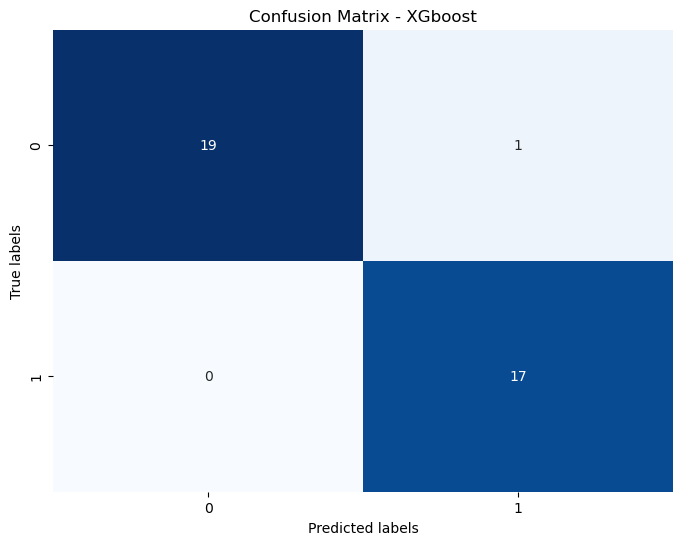

<Figure size 1000x600 with 0 Axes>

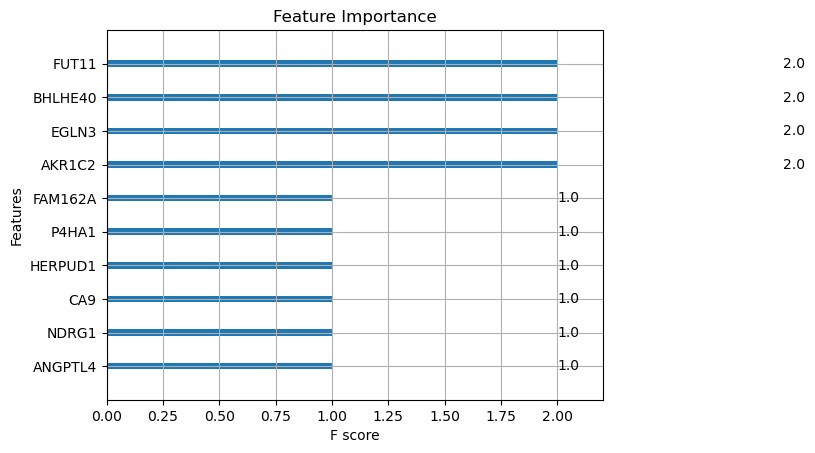

Accuracy: 0.8378378378378378


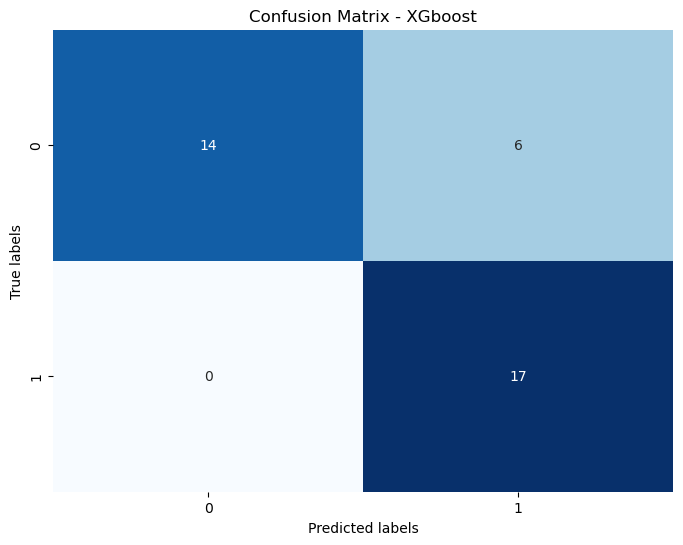

<Figure size 1000x600 with 0 Axes>

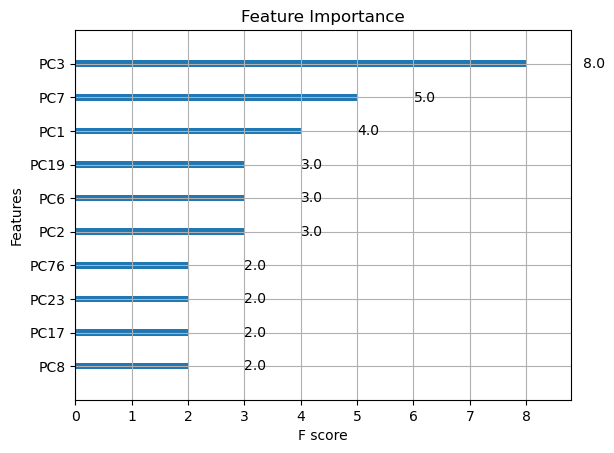

Accuracy: 0.972972972972973


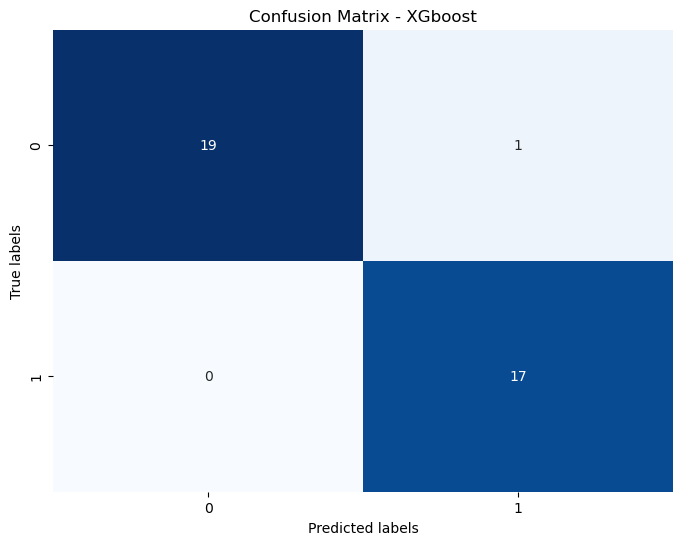

<Figure size 1000x600 with 0 Axes>

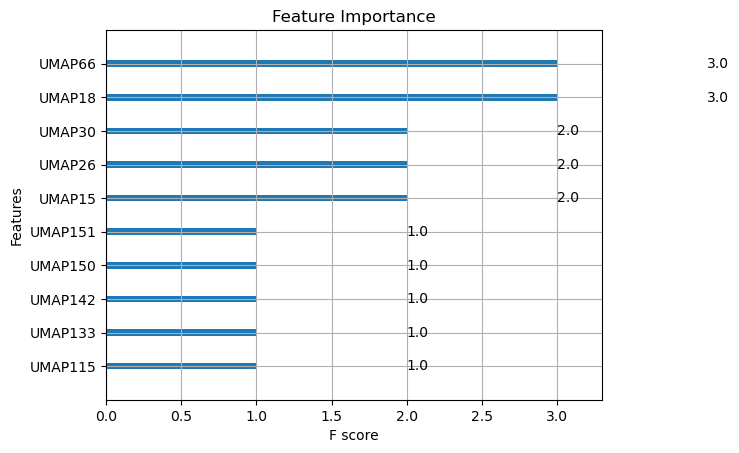

In [197]:
merged_xgboost = run_xgboost(merged)
print(f"Accuracy: {merged_xgboost['accuracy']}")
plot_confusion_matrix(merged_xgboost, merged_xgboost['name'])
plot_feature_importance(merged_xgboost)
pca_xgboost = run_xgboost(lower_dimensional_df_pca)
print(f"Accuracy: {pca_xgboost['accuracy']}")
plot_confusion_matrix(pca_xgboost, pca_xgboost['name'])
plot_feature_importance(pca_xgboost)
umap_xgboost = run_xgboost(lower_dimensional_df_umap)
print(f"Accuracy: {umap_xgboost['accuracy']}")
plot_confusion_matrix(umap_xgboost, umap_xgboost['name'])
plot_feature_importance(umap_xgboost)

In [198]:
def run_kneighbors(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['name'] = 'KNN'
    
    param_grid = {
        'n_neighbors': range(1, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    knn = KNeighborsClassifier()

    # Instantiate Gridsearch
    grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy',
                            n_jobs=-1, cv=kfold)

    # Fit the model
    grid_search.fit(X, y)

    # Print the best parameters
    retval['parameters'] = grid_search.best_params_
    # print(grid_search.best_params_)
    # print(grid_search.best_score_)
    # print(grid_search.best_estimator_)

    knn_optm = KNeighborsClassifier(**grid_search.best_params_)
    retval['model'] = knn_optm

    # Train the KNN classifier
    knn_optm.fit(X_train, y_train)

    # Make predictions on the test set
    knn_predictions = knn_optm.predict(X_test)
    retval['predictions'] = knn_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test, knn_predictions)
    retval['accuracy'] = accuracy

    # Perform k-fold cross-validation
    cv_results = cross_val_score(knn_optm, X, y, cv=kfold, scoring='accuracy')
    # what to do with cross validation accuracy??
    # Print the results
    #print('Accuracy:', cv_results)
    #print('Average accuracy:', cv_results.mean())

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, knn_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, knn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, knn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, knn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, knn_predictions)
    retval['auc'] = auc

    # Calculate classification report
    #print("Classification Report:")
    #print(classification_report(y_test, knn_predictions))


    return retval

Accuracy: 1.0


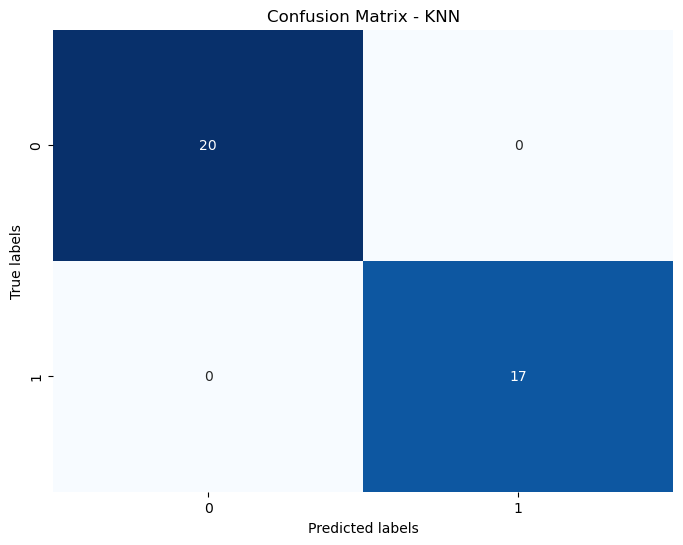

Accuracy: 0.8108108108108109


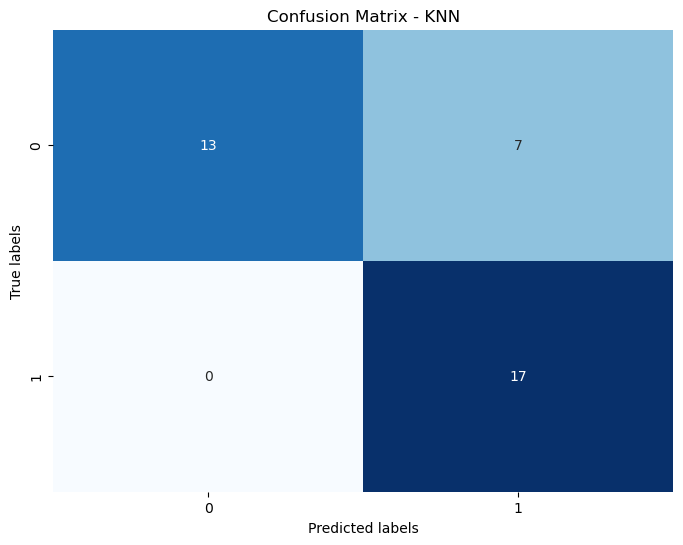

Accuracy: 1.0


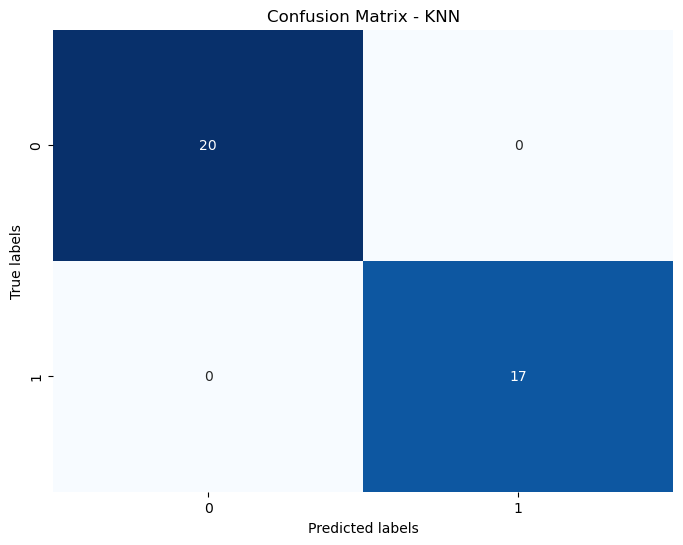

In [200]:
merged_kneighbors = run_kneighbors(merged)
print(f"Accuracy: {merged_kneighbors['accuracy']}")
plot_confusion_matrix(merged_kneighbors, merged_kneighbors['name'])
pca_kneighbors = run_kneighbors(lower_dimensional_df_pca)
print(f"Accuracy: {pca_kneighbors['accuracy']}")
plot_confusion_matrix(pca_kneighbors, pca_kneighbors['name'])
umap_kneighbors = run_kneighbors(lower_dimensional_df_umap)
print(f"Accuracy: {umap_kneighbors['accuracy']}" )
plot_confusion_matrix(umap_kneighbors, umap_kneighbors['name'])

Text(0.5, 0.92, '3D Scatter plot of two genes')

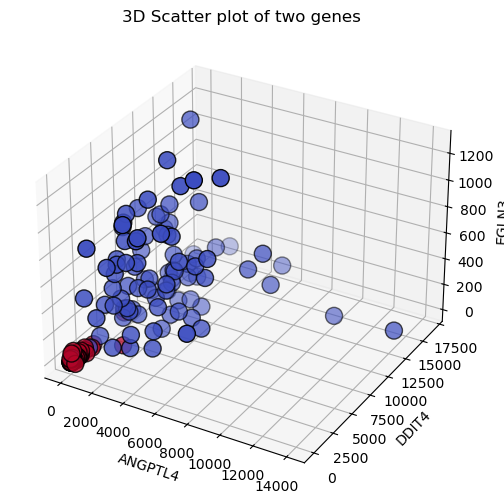

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(merged)
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

In [201]:
def run_log_regression(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['name'] = 'Logistic Regression'
    # Define the parameter grid
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.linspace(0.1, 1, 10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    log_reg = LogisticRegression()

    random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)


    # Fit the model

    random_search.fit(X, y)

    # Print the best parameters
    retval['parameters'] = random_search.best_params_
    #print(random_search.best_params_)
    #print(random_search.best_score_)
    #print(random_search.best_estimator_)

    lr_optm = LogisticRegression(**random_search.best_params_)
    retval['model'] = lr_optm

    # Train the model
    lr_optm.fit(X_train, y_train)

    # Make predictions on the test set
    log_reg_predictions = lr_optm.predict(X_test)
    retval['predictions'] = log_reg_predictions

    # Calculate accuracy
    log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
    retval['accuracy'] = log_reg_accuracy

    # Perform k-fold cross-validation
    cv_results = cross_val_score(lr_optm, X, y, cv=kfold, scoring='accuracy')

    # Print the results
    #print('Accuracy:', cv_results)
    #print('Average accuracy:', cv_results.mean())

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, log_reg_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, log_reg_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, log_reg_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, log_reg_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, log_reg_predictions)
    retval['auc'] = auc

    # Calculate classification report
    #print("Classification Report:")
    #print(classification_report(y_test, log_reg_predictions))

    

    return retval
         
   


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

Accuracy: 1.0


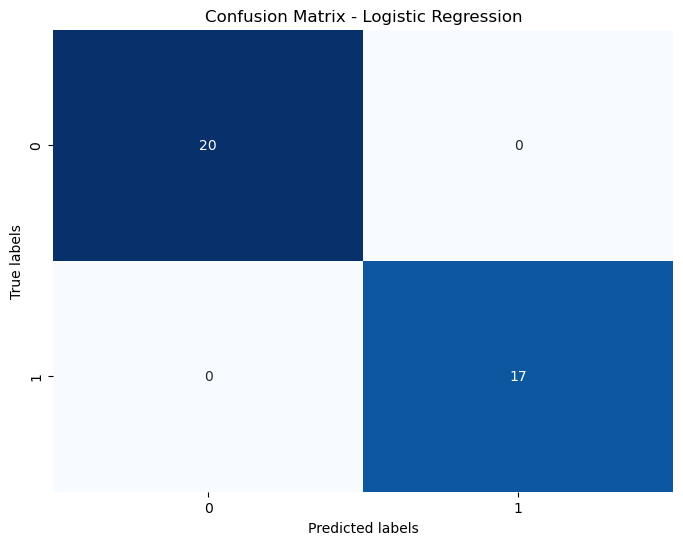

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.war

Accuracy: 0.972972972972973


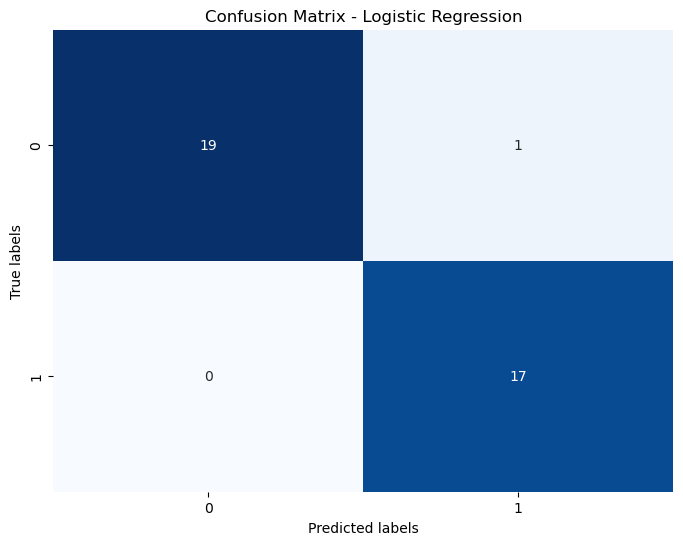

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

Accuracy: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.11/site-packages/sklearn

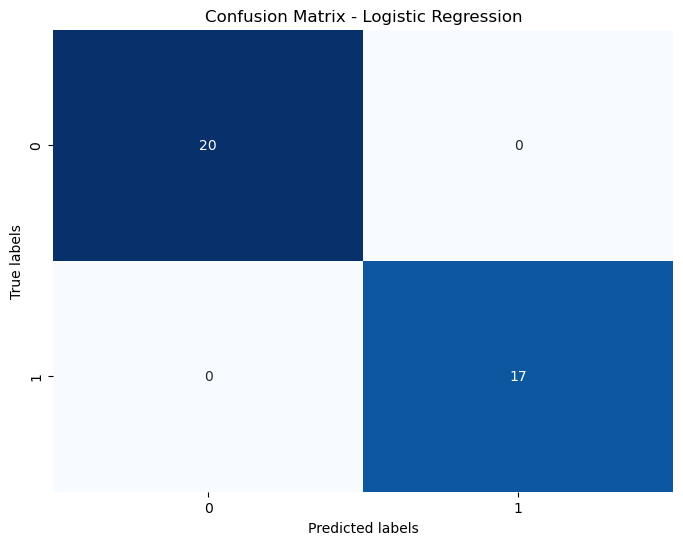

In [203]:
merged_log_regression = run_log_regression(merged)
print(f"Accuracy: {merged_log_regression['accuracy']}")
plot_confusion_matrix(merged_log_regression, merged_log_regression['name'])
pca_log_regression = run_log_regression(lower_dimensional_df_pca)
print(f"Accuracy: {pca_log_regression['accuracy']}")
plot_confusion_matrix(pca_log_regression, pca_log_regression['name'])
umap_log_regression = run_log_regression(lower_dimensional_df_umap)
print(f"Accuracy: {umap_log_regression['accuracy']}")
plot_confusion_matrix(umap_log_regression, umap_log_regression['name'])


RF

In [204]:
def run_random_forest(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['name'] = 'Random Forest'
    # We start by estimating the most important hyperparameter: the number of trees
    param_range = np.arange(1, 100, 10)
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(random_state=42),
        X_train, y_train,
        param_name='n_estimators',
        param_range=param_range,
        cv=5,
        scoring='accuracy'
    )
    # # Plot the learning curve
    # # Find the optimal parameter
    # optimal_param = param_range[np.argmax(np.mean(test_scores, axis=1))]

    # # Plot the learning curve with enhanced appearance
    # plt.figure(figsize=(10, 6))
    # plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score', marker='o', linestyle='-')
    # plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score', marker='o', linestyle='-')
    # plt.axvline(x=optimal_param, color='red', linestyle='--', label='Optimal Parameter')
    # plt.title('Validation Curve for Random Forest')
    # plt.xlabel('Number of Trees (n_estimators)')
    # plt.ylabel('Accuracy')
    # plt.xticks(param_range)
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # We proceed to do a grid search to find the optimal hyperparameters with cross-validation
    param_grid = {
        'max_depth': np.arange(1, 10, 1),
        'min_samples_split': np.arange(2, 10, 1),
        'min_samples_leaf': np.arange(1, 10, 1)
    }
    grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 21, random_state=42), param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters
    retval['parameters']= grid_search.best_params_
    #best_params = grid_search.best_params_
    #print('Best hyperparameters:', best_params)

    # Now we implement the best model
    rf_optm = RandomForestClassifier(n_estimators=21, random_state=42, **retval['parameters'])
    retval['model'] = rf_optm
    
    # Train the model
    rf_optm.fit(X_train, y_train)
    
    # Make predictions on the test set
    rf_predictions = rf_optm.predict(X_test)
    retval['predictions'] = rf_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test,rf_predictions)
    retval['accuracy'] = accuracy
    #print('Accuracy:', random_forest_accuracy)

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, rf_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, rf_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, rf_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, rf_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, rf_predictions)
    retval['auc'] = auc

    # Calculate classification report
    #print("Classification Report:")
    #print(classification_report(y_test, rf_predictions))

    return retval








Accuracy: 1.0


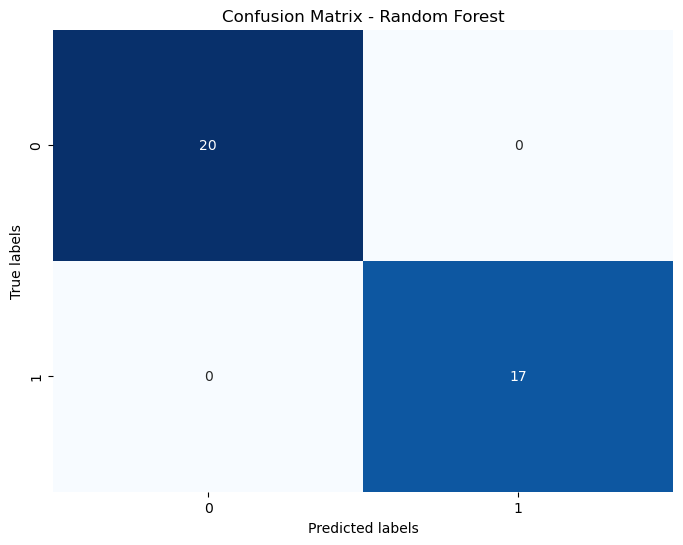

Accuracy: 0.918918918918919


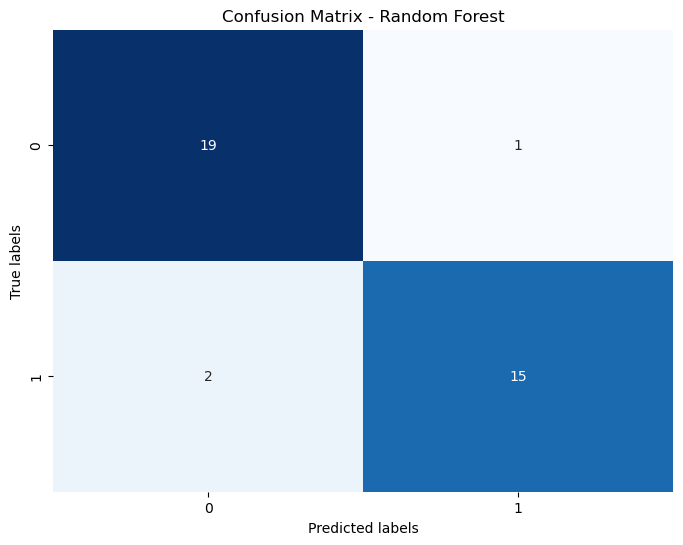

Accuracy: 1.0


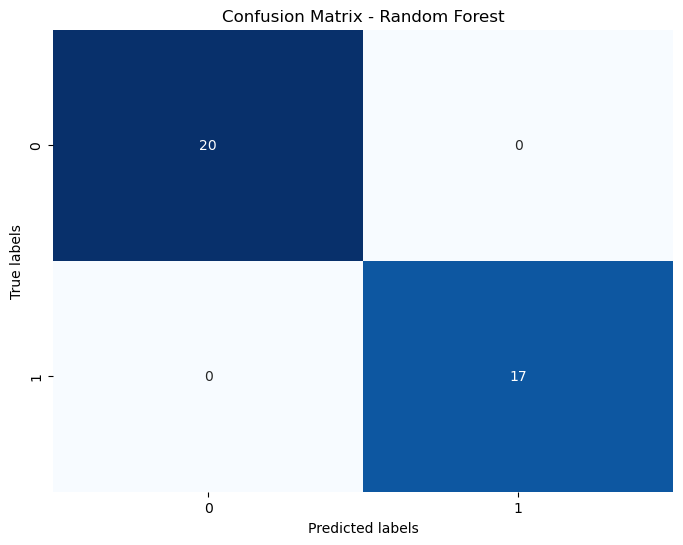

In [205]:
merged_randomforest = run_random_forest(merged)
print(f"Accuracy: {merged_randomforest['accuracy']}")
plot_confusion_matrix(merged_randomforest, merged_randomforest['name'])
pca_randomforest = run_random_forest(lower_dimensional_df_pca)
print(f"Accuracy: {pca_randomforest['accuracy']}")
plot_confusion_matrix(pca_randomforest, pca_randomforest['name'])
umap_randomforest = run_random_forest(lower_dimensional_df_umap)
print(f"Accuracy: {umap_randomforest['accuracy']}")
plot_confusion_matrix(umap_randomforest, umap_randomforest['name'])


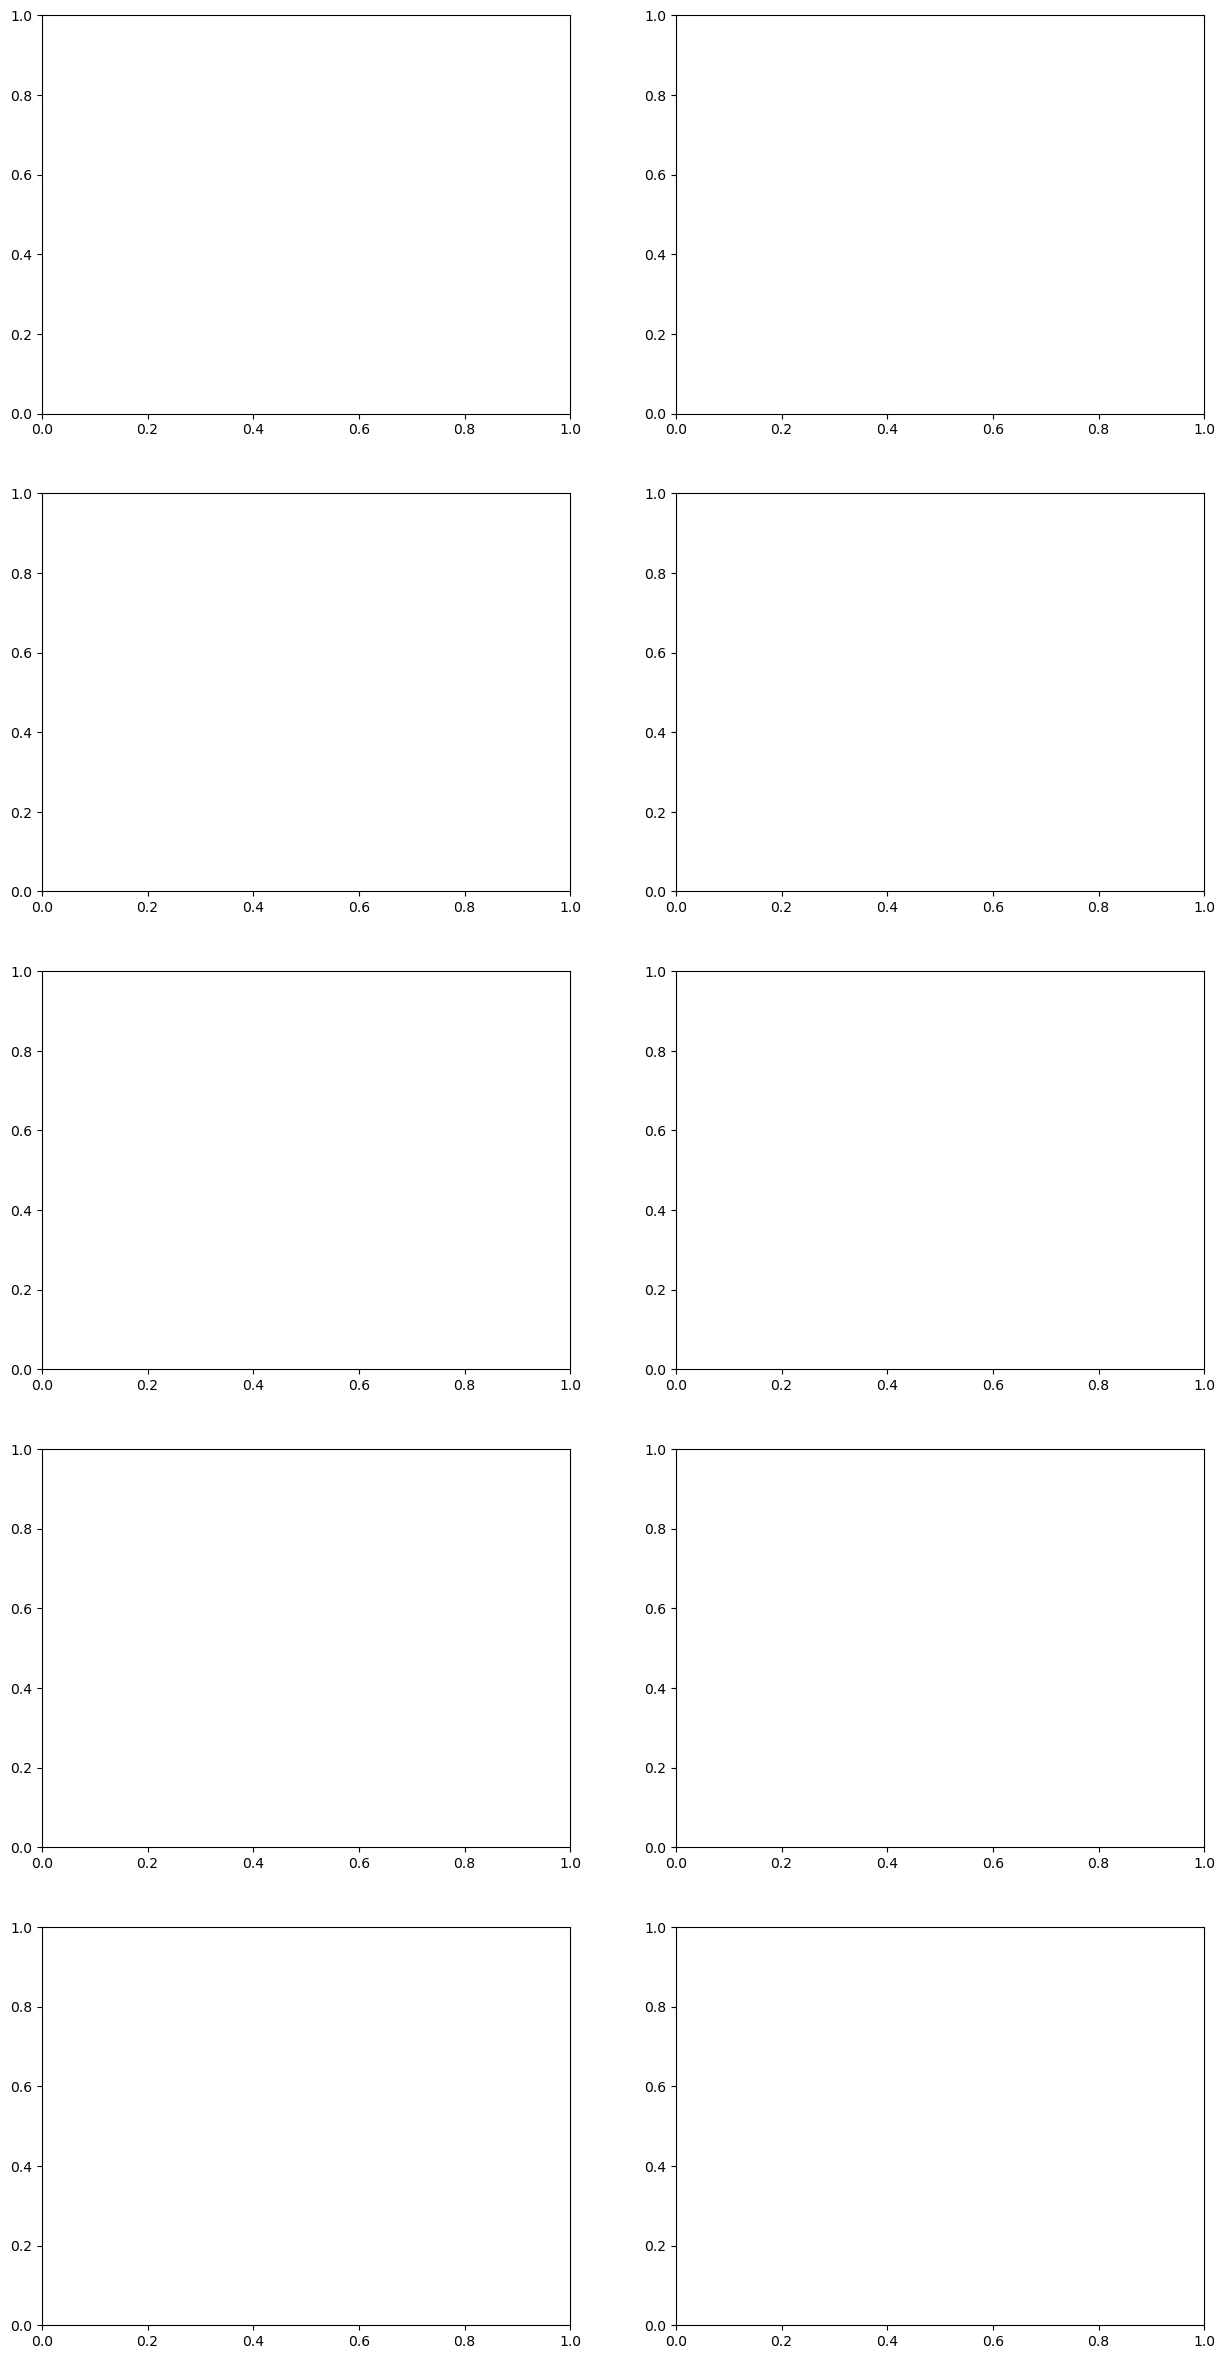

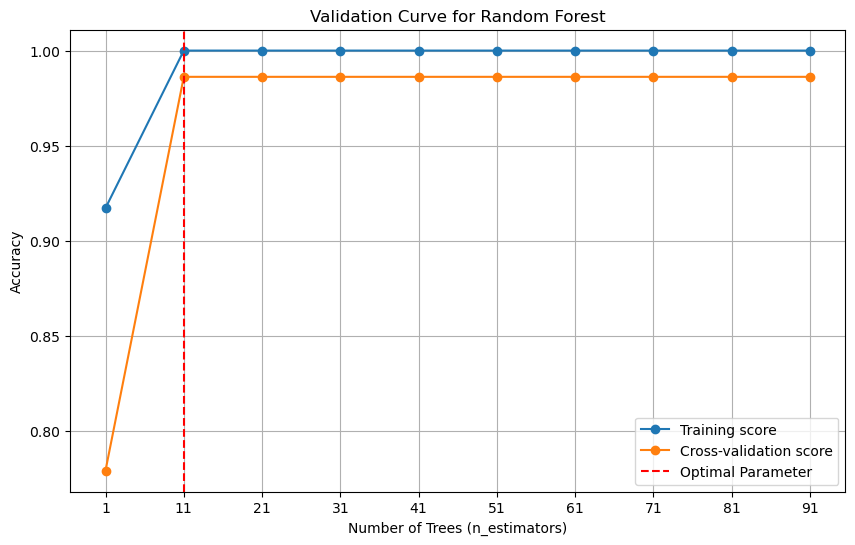

KeyboardInterrupt: 

In [150]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(merged)
rfmodel = run_random_forest(merged)
# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **rfmodel['parameters'])

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)



    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))


In [ ]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest['parameters'], oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

Out-of-Bag (OOB) Accuracy: 0.9615384615384616


SVM

In [206]:
def run_svm(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['name'] = 'SVM'

    # Define the parameter grid
    param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    
    svc_cl = SVC()

    # Initialize GridSearchCV with the SVC classifier and parameter grid
    grid = GridSearchCV(svc_cl, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation

    # Perform grid search with cross-validation
    grid.fit(X_train, y_train)

    # Print the best parameters found
    #print("Best parameters:", grid.best_params_)
    retval['parameters'] = grid.best_params_

    #Now we implement the best model
    svm_optm = SVC(**grid.best_params_)
    retval['model'] = svm_optm

    #train the model
    svm_optm.fit(X_train, y_train)

    # Make predictions on the test set
    svm_predictions = svm_optm.predict(X_test)
    retval['predictions'] = svm_predictions

    #Calculate accuracy
    accuracy = accuracy_score(y_test, svm_predictions)
    retval['accuracy'] = accuracy
    #print("Accuracy:", accuracy)

    #Calculate precision# Create confusion matrix
    conf_matrix = confusion_matrix(y_test, svm_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, svm_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, svm_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, svm_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, svm_predictions)
    retval['auc'] = auc

    return retval



Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

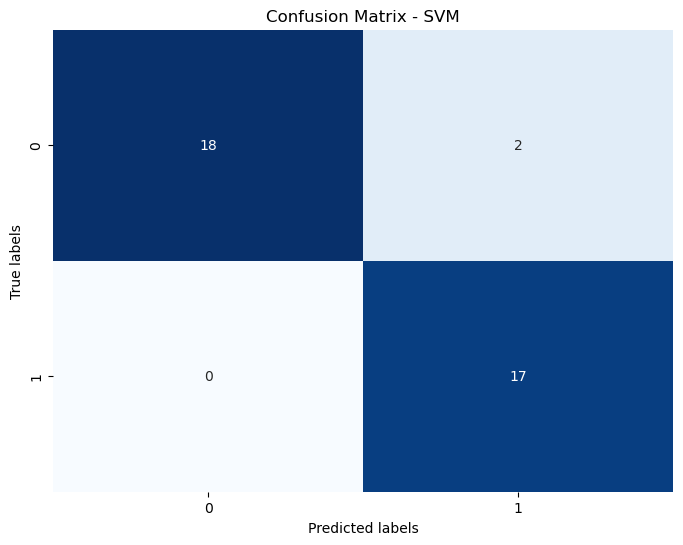

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.483 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

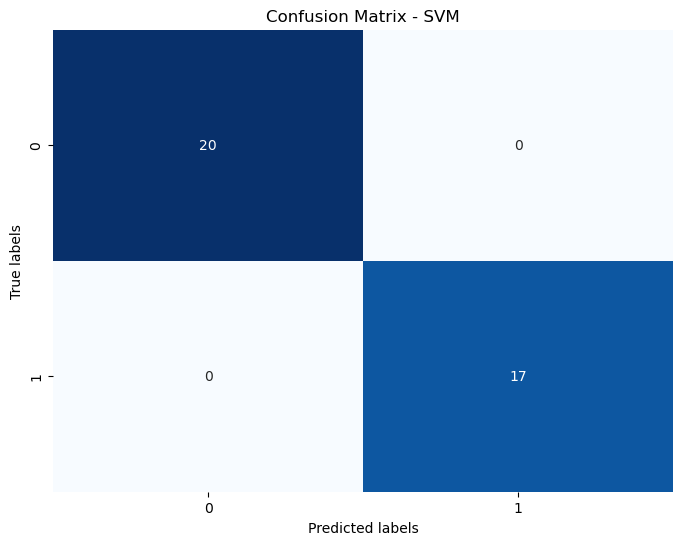

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.828 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

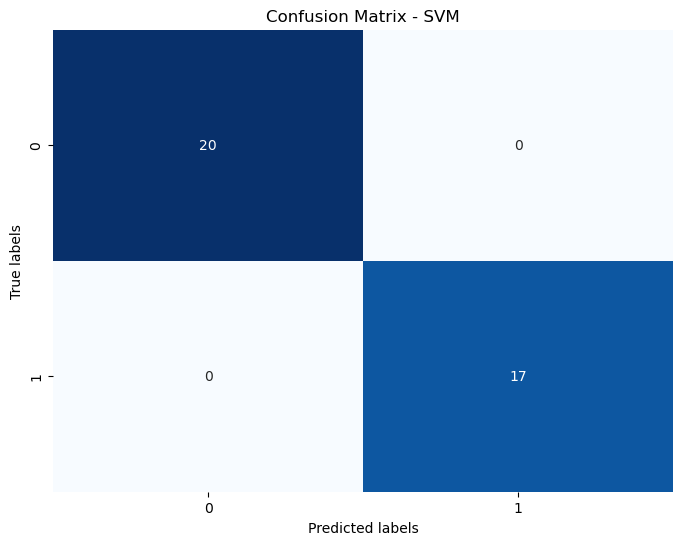

In [207]:
merged_svm = run_svm(merged)
print(f"Accuracy: {merged_svm['accuracy']}")
plot_confusion_matrix(merged_svm, merged_svm['name'])
pca_svm = run_svm(lower_dimensional_df_pca)
print(f"Accuracy: {pca_svm['accuracy']}")
plot_confusion_matrix(pca_svm, pca_svm['name'])
umap_svm = run_svm(lower_dimensional_df_umap)
print(f"Accuracy: {umap_svm['accuracy']}")
plot_confusion_matrix(umap_svm, umap_svm['name'])


Pipeline for model comparison

In [208]:
merged_randomforest = run_random_forest(merged)
merged_svm = run_svm(merged)
merged_log_regression = run_log_regression(merged)
merged_kneighbors = run_kneighbors(merged)
merged_xgboost = run_xgboost(merged)
model_pipleline = []
model_pipleline.append(merged_randomforest)
model_pipleline.append(merged_svm) 
model_pipleline.append(merged_log_regression)
model_pipleline.append(merged_kneighbors)
model_pipleline.append(merged_xgboost)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

In [210]:
# Create a metric of comparison for the models
model_names = []
acc_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []
auc_list = []

for model in model_pipleline:
    # Use the fitted models above to predict on the test data
    #y_pred = model['predictions']
    
    # Name 
    model_names.append(model['name'])

    # Accuracy
    acc = model['accuracy']
    acc_list.append(f"{acc.mean().round(3)}±{acc.std().round(3)}")
    # Precision
    prec = model['precision']
    prec_list_n.append(f"{prec.mean().round(3)}±{prec.std().round(3)}")
    # Recall
    rec = model['recall']
    rec_list_n.append(f"{rec.mean().round(3)}±{rec.std().round(3)}")
    # F1 score
    f1 = model['f1']
    f1_list_n.append(f"{f1.mean().round(3)}±{f1.std().round(3)}")
    # AUC score
    auc = model['auc']
    auc_list.append(f"{auc.mean().round(3)}±{auc.std().round(3)}")

data = {
'Model': model_names,
'Accuracy': acc_list,
'Precision': prec_list_n,
'Recall': rec_list_n,
'F1 Score': f1_list_n,
'AUC Score': auc_list
}

df = pd.DataFrame(data)

# Display DataFrame
print(df)


                 Model   Accuracy  Precision   Recall   F1 Score  AUC Score
0        Random Forest    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
1                  SVM  0.946±0.0  0.895±0.0  1.0±0.0  0.944±0.0   0.95±0.0
2  Logistic Regression    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
3                  KNN    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
4              XGboost  0.973±0.0  0.944±0.0  1.0±0.0  0.971±0.0  0.975±0.0


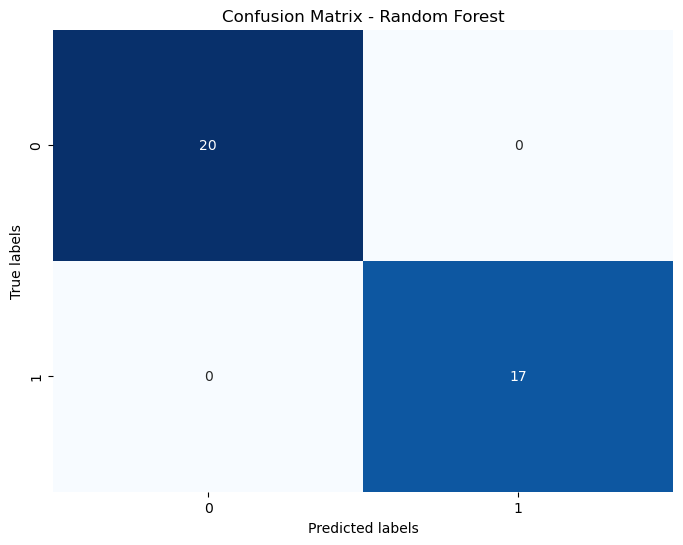

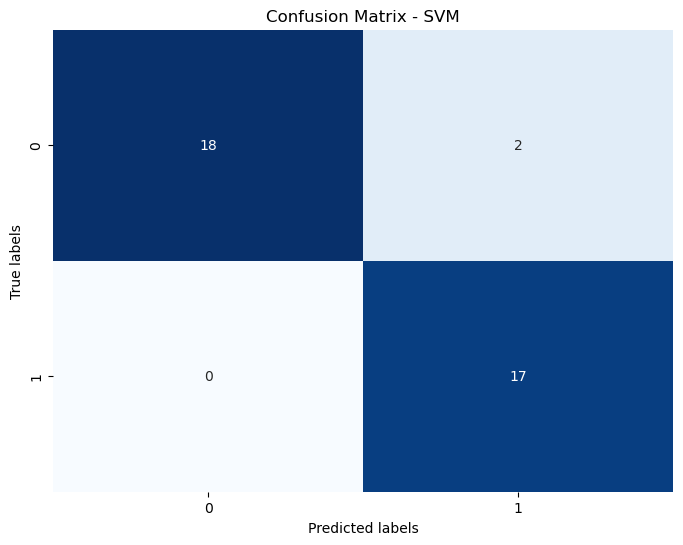

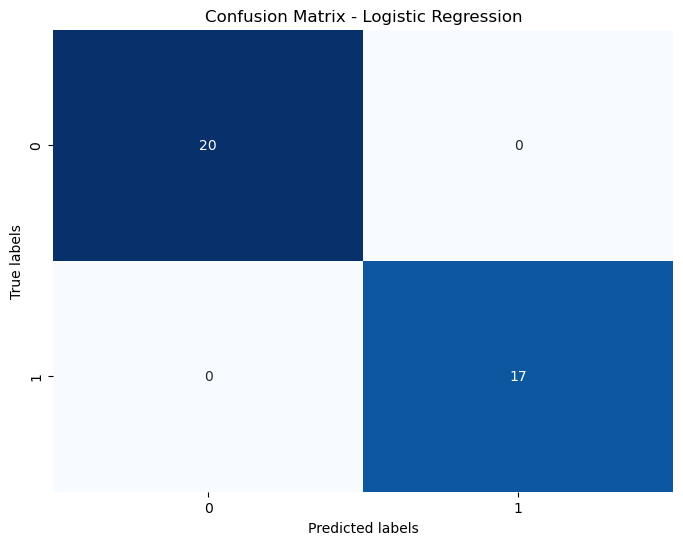

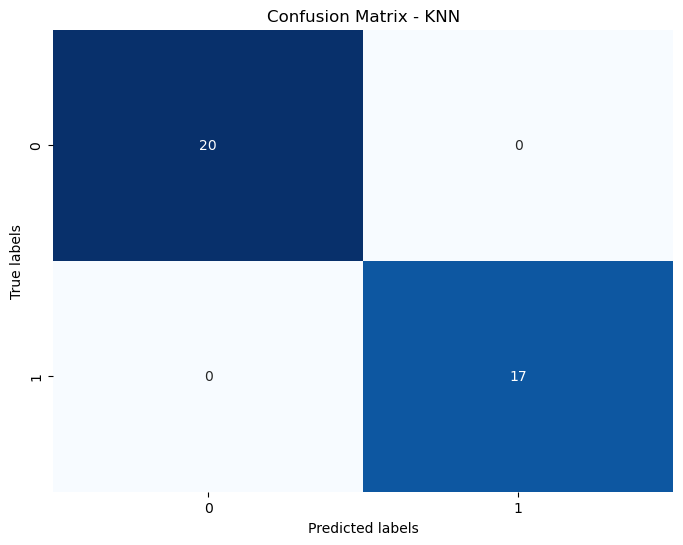

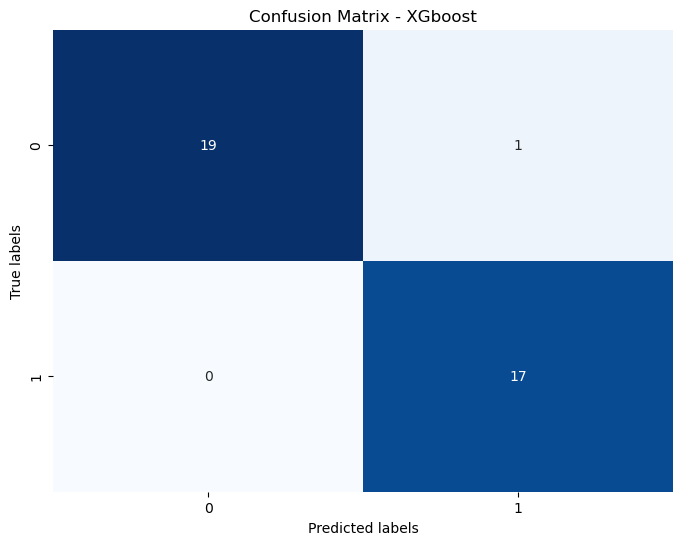

In [211]:
# we will now create plots for the five confusion matrices

for i, model in enumerate(model_pipleline):
    plot_confusion_matrix(model, model['name'])